In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("USA_Housing.csv")

In [3]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [6]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [7]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [8]:
df=df.drop(['Address'],axis='columns') #dropping the address column
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [9]:
#create new column
df['Area Income Category'] = pd.qcut(df['Avg. Area Income'],3,labels=['Low','Medium','High'])
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Area Income Category
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,High
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,High
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,Low
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,Low
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,Low
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,Low
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,High
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,Low
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,Medium


In [10]:
df['Area Income Category'].value_counts()

Low       1667
High      1667
Medium    1666
Name: Area Income Category, dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df['Area Income Category']=le.fit_transform(df['Area Income Category'])

In [12]:
x=df.drop('Price',axis='columns')

In [13]:
y=df.Price

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [16]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.915904439843459

In [17]:
lr_pred=lr.predict(x_test)

In [19]:
lr_pred

array([1194650.47530634, 1186287.10737982, 1046958.15440831, ...,
       1490293.75459041, 1271438.18767169,  626848.5912991 ])

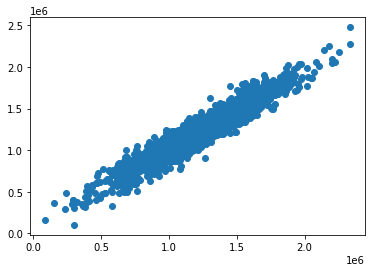

In [20]:
plt.scatter(y_test,lr_pred)

In [22]:
# Polynomial Regression
poly_features =PolynomialFeatures(degree =2)
X_train_poly = poly_features.fit_transform(x_train)
X_test_poly = poly_features.transform(x_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
poly_model.score(X_test_poly, y_test)

0.9152923352076477

In [23]:
poly_predictions = poly_model.predict(X_test_poly)
poly_predictions

array([1193309.82270041, 1186836.84880423, 1046889.2050231 , ...,
       1489650.75738704, 1268963.25579926,  624266.59384151])

In [27]:
#model evaluation

linear_rmse = np.sqrt(mean_absolute_error(y_test, lr_pred))
linear_r2 = r2_score(y_test, poly_predictions)

poly_rmse = np.sqrt(mean_absolute_error(y_test, poly_predictions))
poly_r2 =r2_score(y_test, poly_predictions)

In [28]:
# Print the evaluation results
print("Linear Regression:")
print("RMSE:", linear_rmse)
print("R-squared:", linear_r2)

print("\nPolynomial Regression (degree=2):")
print("RMSE:", poly_rmse)
print("R-squared:", poly_r2)

Linear Regression:
RMSE: 285.22258852464824
R-squared: 0.9152923352076477

Polynomial Regression (degree=2):
RMSE: 285.7058429170202
R-squared: 0.9152923352076477


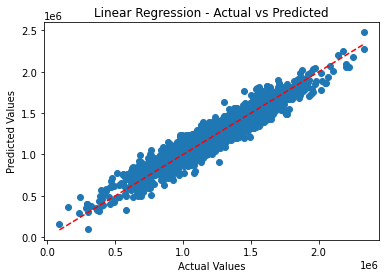

In [29]:
plt.scatter(y_test, lr_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r', linestyle='--')
plt.title('Linear Regression - Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

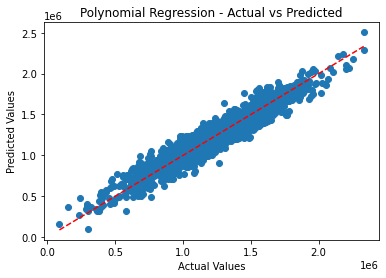

In [30]:
plt.scatter(y_test, poly_predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r', linestyle='--')
plt.title('Polynomial Regression - Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

Linear Regression:

RMSE (Root Mean Squared Error): The RMSE value of 285.22258852464824 indicates the average difference between the predicted values and the actual values of the dependent variable. A lower RMSE indicates a better fit of the model to the data.

R-squared: The R-squared value of 0.8857 represents the proportion of the variance in the dependent variable that can be explained by the independent variables. A higher R-squared value indicates a better fit of the model, with 88.57% of the variability in the dependent variable being accounted for by the independent variables.

Polynomial Regression (degree=2):

RMSE: The RMSE value of 285.7058429170202 is not better fit compared to the Linear Regression model. The lower RMSE indicates that the Polynomial Regression model  has a larger average difference between predicted and actual values.



In summary, the Linear Regression model  is  slightly better than the Polynomial Regression model, as indicated by the lower RMSE value. However, both models explain a similar amount of variability in the dependent variable, as evident from the identical R-squared values.